In [2]:
import torch
import matplotlib.pyplot as plt

In [7]:
# Importing
trials = 50
noise = 0.5
n = 1000
kernel = "gaussian"
results = torch.load("ablation_bayesimp_ntrial={0}_n={1}_d=5_noise={2}_kernel={3}.pt".format(trials,n,noise,kernel), weights_only = True)

# Getting dimensions and names
levels = results[0]['cal_levels']
n_result = len(results)
n_level = len(levels)
n_model = int(n_result/trials)
names = []
for i in range(n_result):
    if results[i]['name'] not in names:
        names.append(results[i]['name'])

In [8]:
# Getting RMSEs
print(names)
rmse = torch.zeros(len(results))

for i in range(len(results)):
    rmse[i] = results[i]['rmse']

rmse = rmse.reshape(n_model,trials).T

print(rmse.mean(0), rmse.var(0)**0.5/trials**0.5)

['bayesimp_optmu=False_exact=False', 'bayesimp_optmu=False_exact=True', 'bayesimp_optmu=True_exact=True']
tensor([0.3866, 0.1270, 0.0987]) tensor([0.0328, 0.0176, 0.0109])


tensor([0.3531, 0.1837, 0.1567])


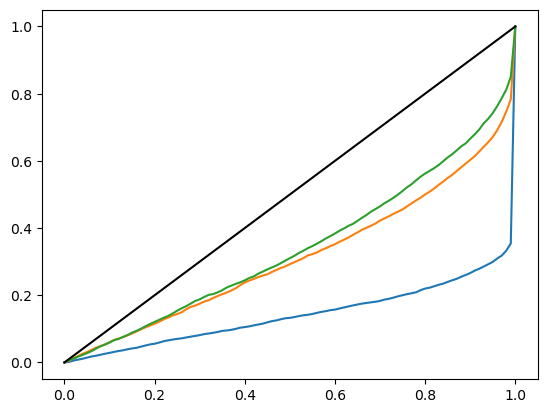

In [9]:
# Getting calibration curves
post_levels = torch.zeros(len(results),n_level)

for i in range(len(results)):
    post_levels[i] =  results[i]['post_levels'].mean(0)

post_levels = post_levels.reshape(n_model,trials,n_level)

plt.plot(levels,post_levels.mean(1).T);
plt.plot(levels,levels, color = "black")

print((post_levels.mean(1).T-levels).abs().mean(0))

tensor([0.3532, 0.1851, 0.1577])


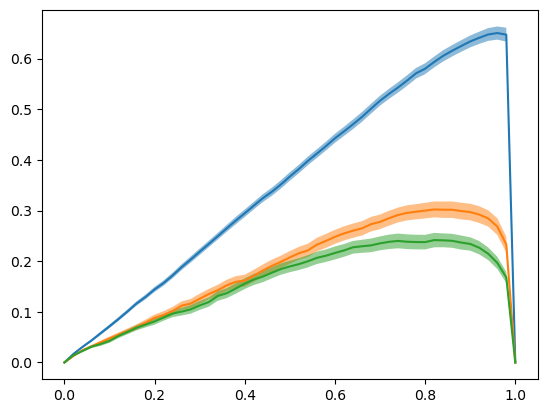

In [10]:
# Getting calibration losses
post_levels = torch.zeros(100,n_model,n_level)

for t in range(trials):
    for m in range(n_model):
        post_levels[:,m] +=  results[trials*m+t]['post_levels']/trials

cal_loss = (post_levels - levels.T[None]).abs()

print(cal_loss.mean((0,2)))

plot_inds = 2*torch.arange(51)

plt.plot(levels[plot_inds],cal_loss.mean(0).T[plot_inds]);
for i in range(n_model):
    plt.fill_between(levels[plot_inds][:,0],
                     cal_loss.mean(0).T[plot_inds,...,i] - cal_loss.var(0).T[plot_inds,...,i]**0.5/trials**0.5,
                     cal_loss.mean(0).T[plot_inds,...,i] + cal_loss.var(0).T[plot_inds,...,i]**0.5/trials**0.5,
                     alpha = 0.5);